In [1]:
#网络结构：
#输入层：4 个特征
#隐藏层 1：5 个神经元，使用 ReLU 激活函数
#隐藏层 2：3 个神经元，使用 ReLU 激活函数
#输出层：2 个神经元，使用 Softmax 激活函数（用于二分类）

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
#运行在cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
class SimpleNN(nn.Module):
  def __init__(self, w1, w2, w3, b1, b2, b3):
    super().__init__()
    self.layer1 = nn.Linear(4, 5)
    self.layer2 = nn.Linear(5, 3)
    self.layer3 = nn.Linear(3, 2)

    self.layer1.weight.data.copy_(w1)
    self.layer1.bias.data.copy_(b1.flatten())

    self.layer2.weight.data.copy_(w2)
    self.layer2.bias.data.copy_(b2.flatten())

    self.layer3.weight.data.copy_(w3)
    self.layer3.bias.data.copy_(b3.flatten())

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.relu(self.layer2(x))
    x = self.layer3(x)
    return x

<ipython-input-56-0927cce7409c>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred, dtype=torch.int32)


torch.int32 torch.int64
epoch: 1 loss: 0.6900
epoch: 11 loss: 0.6406
epoch: 21 loss: 0.5965
epoch: 31 loss: 0.5449
epoch: 41 loss: 0.4818
epoch: 51 loss: 0.4049
epoch: 61 loss: 0.3174
epoch: 71 loss: 0.2316
epoch: 81 loss: 0.1617
epoch: 91 loss: 0.1127
epoch: 101 loss: 0.0811
epoch: 111 loss: 0.0602
epoch: 121 loss: 0.0462
epoch: 131 loss: 0.0365
epoch: 141 loss: 0.0296
epoch: 151 loss: 0.0246
epoch: 161 loss: 0.0207
epoch: 171 loss: 0.0178
epoch: 181 loss: 0.0155
epoch: 191 loss: 0.0136

 the final pred is:
tensor([[ 4.2851,  0.3176],
        [ 4.0734,  8.4026],
        [ 5.0342, -0.4030]], device='cuda:0', grad_fn=<AddmmBackward0>)

 the ture value is:
tensor([[ 4.2822,  0.3259],
        [ 4.0792,  8.3968],
        [ 5.0303, -0.3935]], device='cuda:0', grad_fn=<AddmmBackward0>)


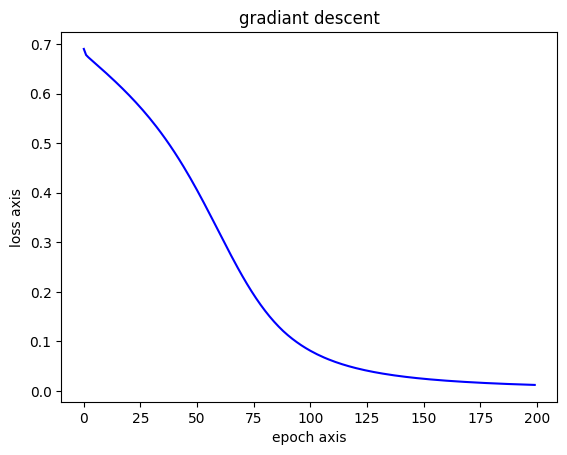

In [56]:
#参数初始化
w1 = torch.tensor([[0.1, 0.2, 0.3, 0.4],
          [0.5, 0.6, 0.7, 0.8],
          [0.2, 0.1, 0.4, 0.3],
          [0.3, 0.5, 0.1, 0.6],
          [0.7, 0.8, 0.2, 0.9]]).to(device) #shape (5,4)

b1= torch.tensor([[0.1],
          [0.2],
          [0.3],
          [0.4],
          [0.5]]).to(device) #shape (5,1)

w2 = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5],
          [0.6, 0.7, 0.8, 0.9, 0.1],
          [0.2, 0.3, 0.4, 0.5, 0.6]]).to(device) #shape (3,5)

b2 = torch.tensor([[0.2],
          [0.3],
          [0.4]]).to(device) #shape (3,1)

w3 = torch.tensor([[0.5, 0.6, 0.7],
          [0.8, 0.9, 0.1]]).to(device) #shape(2,3)

b3 = torch.tensor([[0.1],
          [0.2]]).to(device) #shape (2,1)

x = torch.tensor([[0.1, 0.2, 0.3, 0.4],
          [0.5, 0.6, 0.7, 0.8],
          [0.9, 0.1, 0.2, 0.3]]).to(device) #shape (3,4)

y_true = torch.tensor([[1, 0],  # 类 0
            [0, 1],  # 类 1
            [1, 0]]).to(device)  # 类 0).to(device) #shape (5,4)

y_true = torch.argmax(y_true, dim=1).to(device)


model = SimpleNN(w1, w2, w3, b1, b2, b3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr =0.1)

epochs = 200
losses = []

y_pred = model(x)
y_pred = torch.tensor(y_pred, dtype=torch.int32)

print(y_pred.dtype, y_true.dtype)

for epoch in range(epochs):
  y_pred = model(x)

  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%10 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")

final_prediction = model(x)
print("\n the final pred is:")
print(final_prediction)

print("\n the ture value is:")
print(y_pred)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.title("gradiant descent")
plt.show()